Trzy boty:
<ul>
<li> Pierwszy, który był głupi i wyzerował portfel po wyjechaniu poza granicę gridu
<li> Z sentymentem, wolny - line_dist = 250, wait_time = 60*10
<li> Z sentymentem, szybki - równolegle z wolnym - line_dist = 100, wait_time = 1*10
</ul>

Importy

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle
# import matplotlib.pyplot as plt

def plot_data_transactions(transactions):
    plt.figure(figsize = (20,10)) 
    transactions['Trigger Price'].plot(color = 'k', label= 'Price') 
    # data['FMA'].plot(color = 'green',label = 'FMA') 
    # data['SMA'].plot(color = 'red', label = 'SMA')

    plt.plot(transactions[transactions['Type'] == 'BUY'].index, 
             transactions[transactions['Type'] == 'BUY']['Trigger Price'], 
             '^', markersize = 10, color = 'g', label = 'BUY')

    plt.plot(transactions[transactions['Type'] == 'SELL'].index, 
             transactions[transactions['Type'] == 'SELL']['Trigger Price'], 
             'v', markersize = 10, color = 'r', label = 'SELL')

    for i in range(38000, 41000, 100):
        plt.axhline(y=i, color='black', linestyle='-', linewidth = 0.2, alpha = 0.5)

    plt.ylim([40000, 41000])
    plt.ylim(transactions['Price'].min(), transactions['Trigger Price'].max())

    legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('lightcyan')

    # plt.plot(data[data['position'] == 'sell'].index, 
    #          data['SMA'][data['position'] == 'sell'], 
    #          'v', markersize = 5, color = 'r', label = 'sell')

def plot_data_transactions_old(transactions):
    plt.figure(figsize = (20,10)) 
    transactions['Price'].plot(color = 'k', label= 'Price') 
    # data['FMA'].plot(color = 'green',label = 'FMA') 
    # data['SMA'].plot(color = 'red', label = 'SMA')

    plt.plot(transactions[transactions['Type'] == 'BUY'].index, 
             transactions[transactions['Type'] == 'BUY']['Price'], 
             '^', markersize = 10, color = 'g', label = 'BUY')

    plt.plot(transactions[transactions['Type'] == 'SELL'].index, 
             transactions[transactions['Type'] == 'SELL']['Price'], 
             'v', markersize = 10, color = 'r', label = 'SELL')

    for i in range(38000, 41000, 100):
        plt.axhline(y=i, color='black', linestyle='-', linewidth = 0.2, alpha = 0.5)

    plt.ylim([40000, 41000])
    plt.ylim(transactions['Price'].min(), transactions['Price'].max())

    legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('lightcyan')

    # plt.plot(data[data['position'] == 'sell'].index, 
    #          data['SMA'][data['position'] == 'sell'], 
    #          'v', markersize = 5, color = 'r', label = 'sell')

Wczytanie danych

In [10]:
transactions_old = pd.read_json('KNTB-bot-grid-old-data/transactions.json').transpose()
transactions_old['Time'] = [x.timestamp()*1000 for x in transactions_old.index]
transactions_old['Datetime'] = pd.to_datetime(transactions_old['Time'], unit='ms')

transactions_sentiment = pd.read_json('KNTB-bot-grid-sentiment-data/transactions.json').transpose()
# transactions_sentiment['Time Unchanged'] = [x.timestamp()*1000 for x in transactions_sentiment.index]
transactions_sentiment['Time'] = [x.timestamp()*1000 for x in transactions_sentiment.index]
transactions_sentiment['Datetime'] = pd.to_datetime(transactions_sentiment['Time'], unit='ms')
transactions_sentiment['Trigger Price'].fillna(transactions_sentiment['Price'], inplace=True)
transactions_sentiment['Balance BTC'] = transactions_sentiment['Binance Balance'].apply(lambda a: a[1]['free'] if isinstance(a, list) else a)
transactions_sentiment['Balance USDT'] = transactions_sentiment['Binance Balance'].apply(lambda a: a[6]['free'] if isinstance(a, list) else a) 
transactions_sentiment['Balance Total'] = transactions_sentiment['Balance USDT'].astype(float) + transactions_sentiment['Balance BTC'].astype(float)*transactions_sentiment['Trigger Price'].astype(float)
transactions_sentiment['Commission'] = transactions_sentiment['Type'].apply(lambda a: 0.5 if a == 'BUY' or a == 'SELL' else 0)
transactions_sentiment['Commission Cumulative'] = transactions_sentiment['Commission'].cumsum()
transactions_sentiment['Balance Total Adjusted'] = transactions_sentiment['Balance Total'] - transactions_sentiment['Commission Cumulative']
# transactions_sentiment['Balance Total']=transactions_sentiment['Balance USDT'] + transactions_sentiment['Balance BTC'].mul(transactions_sentiment['Trigger Price'])
# transactions_sentiment['Balance Total'] = transactions_sentiment[['Balance BTC'], ['Trigger Price']].apply(lambda a: a['Balance BTC']*a['Trigger Price'] if isinstance(a, list) else a) 
# transactions_sentiment_wallet = transactions_sentiment.loc[transactions_sentiment['Balance USDT'] > 0]

# new column is equal to 0.5 if type is buy or sell, 0 if else
# # create a column called total balance
# # which is a product of multiplying the balance of BTC and the trigger price
# def total_balance(row):
#     return row['Balance USDT'] + row['Balance BTC']*row['Trigger Price']

# test = transactions_sentiment.apply(lambda a: total_balance(a) if isinstance(a, float) else a)


transactions_sentiment_slow = pd.read_json('KNTB-bot-grid-sentiment-slow-data/transactions.json').transpose()
# transactions_sentiment_slow['Time Unchanged'] = [x.timestamp()*1000 for x in transactions_sentiment_slow.index]
transactions_sentiment_slow['Time'] = [x.timestamp()*1000 for x in transactions_sentiment_slow.index]
transactions_sentiment_slow['Datetime'] = pd.to_datetime(transactions_sentiment_slow['Time'], unit='ms')
transactions_sentiment_slow['Trigger Price'].fillna(transactions_sentiment_slow['Price'], inplace=True)
transactions_sentiment_slow['Balance BTC'] = transactions_sentiment_slow['Binance Balance'].apply(lambda a: a[1]['free'] if isinstance(a, list) else a)
transactions_sentiment_slow['Balance USDT'] = transactions_sentiment_slow['Binance Balance'].apply(lambda a: a[6]['free'] if isinstance(a, list) else a) 
transactions_sentiment_slow['Balance Total'] = transactions_sentiment_slow['Balance USDT'].astype(float) + transactions_sentiment_slow['Balance BTC'].astype(float)*transactions_sentiment_slow['Trigger Price'].astype(float)
transactions_sentiment_slow['Commission'] = transactions_sentiment_slow['Type'].apply(lambda a: 0.5 if a == 'BUY' or a == 'SELL' else 0)
transactions_sentiment_slow['Commission Cumulative'] = transactions_sentiment_slow['Commission'].cumsum()
transactions_sentiment_slow['Balance Total Adjusted'] = transactions_sentiment_slow['Balance Total'] - transactions_sentiment_slow['Commission Cumulative']



transactions_sentiment_fast = pd.read_json('KNTB-bot-grid-sentiment-fast-data/transactions.json').transpose()
# transactions_sentiment_fast['Time Unchanged'] = [x.timestamp()*1000 for x in transactions_sentiment_fast.index]
transactions_sentiment_fast['Time'] = [x.timestamp()*1000 for x in transactions_sentiment_fast.index]
transactions_sentiment_fast['Datetime'] = pd.to_datetime(transactions_sentiment_fast['Time'], unit='ms')
transactions_sentiment_fast['Trigger Price'].fillna(transactions_sentiment_fast['Price'], inplace=True)
transactions_sentiment_fast['Balance BTC'] = transactions_sentiment_fast['Binance Balance'].apply(lambda a: a[1]['free'] if isinstance(a, list) else a)
transactions_sentiment_fast['Balance USDT'] = transactions_sentiment_fast['Binance Balance'].apply(lambda a: a[6]['free'] if isinstance(a, list) else a) 
transactions_sentiment_fast['Balance Total'] = transactions_sentiment_fast['Balance USDT'].astype(float) + transactions_sentiment_fast['Balance BTC'].astype(float)*transactions_sentiment_fast['Trigger Price'].astype(float)
transactions_sentiment_fast['Commission'] = transactions_sentiment_fast['Type'].apply(lambda a: 0.5 if a == 'BUY' or a == 'SELL' else 0)
transactions_sentiment_fast['Commission Cumulative'] = transactions_sentiment_fast['Commission'].cumsum()
transactions_sentiment_fast['Balance Total Adjusted'] = transactions_sentiment_fast['Balance Total'] - transactions_sentiment_fast['Commission Cumulative']

balance_old = pd.read_json('KNTB-bot-grid-old-data/balance.json')
balance_sentiment = pd.read_json('KNTB-bot-grid-sentiment-data/balance.json')
balance_sentiment_slow = pd.read_json('KNTB-bot-grid-sentiment-slow-data/balance.json')
balance_sentiment_fast = pd.read_json('KNTB-bot-grid-sentiment-fast-data/balance.json')

# Analiza

Ile kosztów się uzbierało?

In [11]:
with open('KNTB-bot-grid-sentiment-data/commission_amount.pkl', 'rb') as f:
    commission_sentiment = pickle.load(f)[0]

with open('KNTB-bot-grid-sentiment-fast-data/commission_amount.pkl', 'rb') as f:
    commission_sentiment_fast = pickle.load(f)[0]
    
with open('KNTB-bot-grid-sentiment-slow-data/commission_amount.pkl', 'rb') as f:
    commission_sentiment_slow = pickle.load(f)[0]

print(commission_sentiment)
print(commission_sentiment_slow)
print(commission_sentiment_fast) # lol


174.0
140.5
2219.0


Kursy

In [12]:
fig = px.line(transactions_old, x ='Datetime', y = 'Price', title='Old', template = 'simple_white')

balance_usdt = (balance_old.loc[balance_old['asset'] == 'USDT']['free'].values[0] +
(balance_old.loc[balance_old['asset'] == 'BTC']['free'].values[0] - 1)*transactions_old.iloc[-1]['Price'])

print('Stan konta początkowo: 10000 USDT')
print('Stan konta: ' + str(balance_usdt) + ' USDT')

print('Gratulacje! Zarobiłeś ' + str(round(balance_usdt - 10000, 2)) + ' USDT')
fig.show()

Stan konta początkowo: 10000 USDT
Stan konta: 4793.710520120003 USDT
Gratulacje! Zarobiłeś -5206.29 USDT


In [ ]:
fig = px.line(transactions_sentiment, x ='Datetime', y = 'Trigger Price', title='Sentiment', template = 'simple_white')

balance_usdt = (balance_sentiment.loc[balance_sentiment['asset'] == 'USDT']['free'].values[0] +
(balance_sentiment.loc[balance_sentiment['asset'] == 'BTC']['free'].values[0] - 1)*transactions_sentiment.iloc[-1]['Trigger Price'])

print('Stan konta początkowo: 10000 USDT')
print('Stan konta: ' + str(balance_usdt) + ' USDT')

print('Gratulacje! Zarobiłeś ' + str(round(balance_usdt - 10000, 2)) + ' USDT')

fig.show()

Stan konta początkowo: 10000 USDT
Stan konta: 9960.399486440003 USDT
Gratulacje! Zarobiłeś -39.6 USDT


In [ ]:
fig = px.line(transactions_sentiment_slow, x ='Datetime', y = 'Trigger Price', title='Sentiment Slow', template = 'simple_white')

balance_usdt = (balance_sentiment_slow.loc[balance_sentiment_slow['asset'] == 'USDT']['free'].values[0] +
(balance_sentiment_slow.loc[balance_sentiment_slow['asset'] == 'BTC']['free'].values[0] - 1)*transactions_sentiment_slow.iloc[-1]['Trigger Price'])

print('Stan konta początkowo: 10000 USDT')
print('Stan konta: ' + str(balance_usdt) + ' USDT')

print('Gratulacje! Zarobiłeś ' + str(round(balance_usdt - 10000, 2)) + ' USDT')

fig.show()

Stan konta początkowo: 10000 USDT
Stan konta: 9926.492517510003 USDT
Gratulacje! Zarobiłeś -73.51 USDT


In [ ]:
fig = px.line(transactions_sentiment_fast, x ='Datetime', y = 'Trigger Price', title='Sentiment Fast', template = 'simple_white')

balance_usdt = (balance_sentiment_fast.loc[balance_sentiment_fast['asset'] == 'USDT']['free'].values[0] +
(balance_sentiment_fast.loc[balance_sentiment_fast['asset'] == 'BTC']['free'].values[0] - 1)*transactions_sentiment_fast.iloc[-1]['Trigger Price'])

print('Stan konta początkowo: 10000 USDT')
print('Stan konta: ' + str(balance_usdt) + ' USDT')

print('Gratulacje! Zarobiłeś ' + str(round(balance_usdt - 10000, 2)) + ' USDT')

fig.show()

Stan konta początkowo: 10000 USDT
Stan konta: 9893.7385581 USDT
Gratulacje! Zarobiłeś -106.26 USDT


# Porfele

Wykres - portfel bota na sentyment

In [25]:
plot_data = transactions_sentiment[['Datetime', 'Balance Total', 'Balance Total Adjusted']]
plot_data = plot_data.loc[plot_data['Balance Total'].notna()]
plot_data

fig = px.line(plot_data, x ='Datetime', y = 'Balance Total', title='Sentiment Balance', template = 'simple_white')
fig.show()

In [27]:
print('Portfel na końcu jest wart ' + str(round(plot_data['Balance Total'][-1]/plot_data['Balance Total'][0]*100, 2)) + '% końcowego')
print('Uwzględnienie comissions - '+  str(round(plot_data['Balance Total Adjusted'][-1]/plot_data['Balance Total Adjusted'][0]*100, 2)) + '% końcowego')

Portfel na końcu jest wart 98.79% końcowego
Uwzględnienie comissions - 98.37% końcowego


Wykres - portfel bota szybkiego

In [29]:
plot_data = transactions_sentiment_fast[['Datetime', 'Balance Total', 'Balance Total Adjusted']]
plot_data = plot_data.loc[plot_data['Balance Total'].notna()]
plot_data

fig = px.line(plot_data, x ='Datetime', y = 'Balance Total', title='Sentiment Balance', template = 'simple_white')
fig.show()

In [30]:
print('Portfel na końcu jest wart ' + str(round(plot_data['Balance Total'][-1]/plot_data['Balance Total'][0]*100, 2)) + '% końcowego')
print('Uwzględnienie comissions - '+  str(round(plot_data['Balance Total Adjusted'][-1]/plot_data['Balance Total Adjusted'][0]*100, 2)) + '% końcowego')

Portfel na końcu jest wart 103.8% końcowego
Uwzględnienie comissions - 98.23% końcowego


Wykres - portfel bota wolnego

In [37]:
plot_data = transactions_sentiment_slow[['Datetime', 'Balance Total', 'Balance Total Adjusted']]
plot_data = plot_data.loc[plot_data['Balance Total'].notna()]
plot_data

fig = px.line(plot_data, x ='Datetime', y = 'Balance Total', title='Sentiment Balance', template = 'simple_white')
fig.show()

In [32]:
print('Portfel na końcu jest wart ' + str(round(plot_data['Balance Total'][-1]/plot_data['Balance Total'][0]*100, 2)) + '% końcowego')
print('Uwzględnienie comissions - '+  str(round(plot_data['Balance Total Adjusted'][-1]/plot_data['Balance Total Adjusted'][0]*100, 2)) + '% końcowego')

Portfel na końcu jest wart 103.4% końcowego
Uwzględnienie comissions - 103.05% końcowego


W tym samym czasie rynek zrobił 5,14%

In [39]:
transactions_sentiment_slow['Trigger Price'][-1]/transactions_sentiment_slow['Trigger Price'][0]

1.0513856927056444

Wykres - porównanie portfeli botów wolnego i szybkiego

In [ ]:
plot_data_fast = transactions_sentiment_fast[['Datetime', 'Balance Total']]
plot_data_fast = plot_data_fast.loc[plot_data_fast['Balance Total'].notna()]
plot_data_fast

plot_data_slow = transactions_sentiment_slow[['Datetime', 'Balance Total']]
plot_data_slow = plot_data_slow.loc[plot_data_slow['Balance Total'].notna()]
plot_data_slow


fig = make_subplots()

fig.add_trace(
    go.Line(y = plot_data_fast['Balance Total'], x = plot_data_fast['Datetime'], name="Fast"),
)
fig.add_trace(
    go.Line(y = plot_data_slow['Balance Total'], x = plot_data_slow['Datetime'], name="Slow"),
)

fig.update_layout(template = 'simple_white', title = "Portfele - fast vs slow")
fig.update_layout(yaxis_title = 'Wartość portfela')
fig.update_layout(xaxis_title = 'Czas')
fig.update_layout(yaxis_range = [38000, 42000])

width = 1500
height = 800
fig.update_layout(width=width, height=height)
fig.add_hline(y=0, opacity=1, line_width=0.5, line_color='black')
fig.show()

c:\Users\Michal\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Wykres - porównanie portfeli botów wolnego i szybkiego z poprawką na opłaty

In [13]:
plot_data_fast = transactions_sentiment_fast[['Datetime', 'Balance Total Adjusted']]
plot_data_fast = plot_data_fast.loc[plot_data_fast['Balance Total Adjusted'].notna()]
plot_data_fast

plot_data_slow = transactions_sentiment_slow[['Datetime', 'Balance Total Adjusted']]
plot_data_slow = plot_data_slow.loc[plot_data_slow['Balance Total Adjusted'].notna()]
plot_data_slow


fig = make_subplots()

fig.add_trace(
    go.Line(y = plot_data_fast['Balance Total Adjusted'], x = plot_data_fast['Datetime'], name="Fast"),
)
fig.add_trace(
    go.Line(y = plot_data_slow['Balance Total Adjusted'], x = plot_data_slow['Datetime'], name="Slow"),
)

fig.update_layout(template = 'simple_white', title = "Portfele - fast vs slow + opłaty")
fig.update_layout(yaxis_title = 'Wartość portfela')
fig.update_layout(xaxis_title = 'Czas')
fig.update_layout(yaxis_range = [37000, 42000])

width = 1500
height = 800
fig.update_layout(width=width, height=height)
fig.add_hline(y=0, opacity=1, line_width=0.5, line_color='black')
fig.show()

c:\Users\Michal\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Transakcje są zawierane częściej na szybkim bocie - stąd wysokie koszty transakcji

I jeszcze stary bot, któy zablokował się na kupowaniu jak wyleciał poza przedział bo za bardzo spadło


In [62]:
balance_old
# start
start = 10000 + 1*39293.4

# 10000 usdt + 1 btc
# transactions_old[:20]
transactions_old['Price'][-1]

end = 34468.086438 + 0.054600*31388.17 - 6273*0.001*500

# 0.32961855907687443
1 - end/start

# 0.20118467732494527
1 - 31388.17/39293.4


# len(transactions_old.loc[transactions_old.Type.isin(['BUY', 'SELL'])])

# 6273*0.001*500

0.20118467732494527

# Transakcje

Wykres transakcji - old

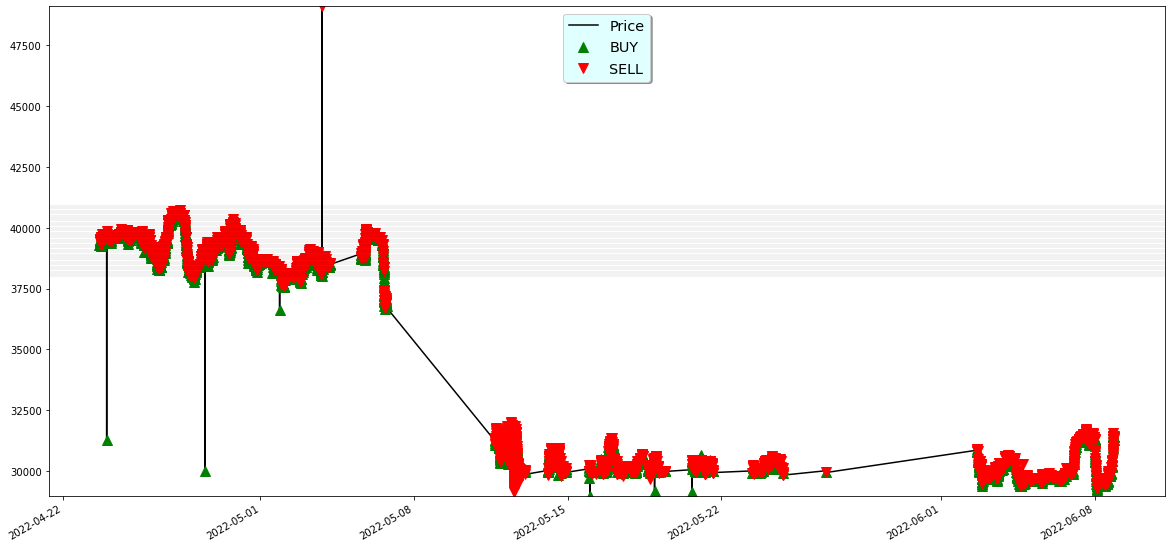

In [ ]:
plot_data_transactions_old(transactions_old)

Wykres transakcji - slow

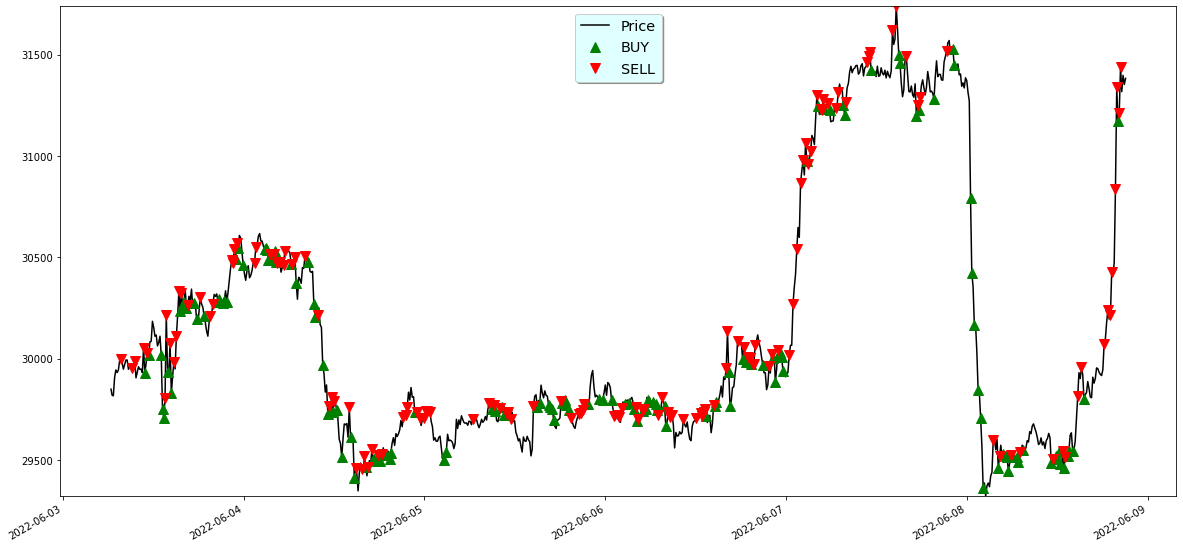

In [ ]:
plot_data_transactions(transactions_sentiment_slow)

Wykres transakcji - fast

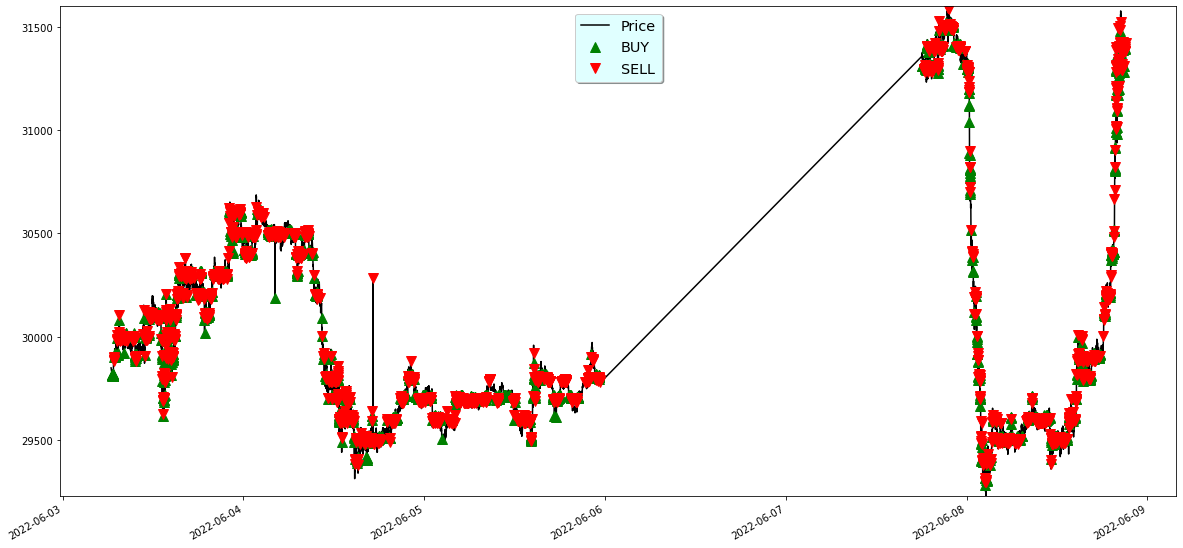

In [ ]:
plot_data_transactions(transactions_sentiment_fast)

Stary bot - z

# Backtesting

In [34]:
from binance.client import Client
client = Client('','') 

Wczytanie candles

In [35]:
candles_1m = client.get_historical_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE, start_str='1 Apr 2022', end_str='8 June 2022')

df_1m = pd.DataFrame(candles_1m, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'dt', 
                                    'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
                                    'Taker buy quote asset volume', 'Ignore'])
df_1m = df_1m.filter(['Open', 'High', 'Low', 'Close', 'Volume'])

In [36]:
candles_15m = client.get_historical_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_15MINUTE, start_str='1 Apr 2022', end_str='8 June 2022')

df_15m = pd.DataFrame(candles_15m, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'dt', 
                                    'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
                                    'Taker buy quote asset volume', 'Ignore'])
df_15m = df_15m.filter(['Open', 'High', 'Low', 'Close', 'Volume', 'dt'])
df_15m.set_index('dt', inplace=True)

Fastquant

In [ ]:
from fastquant import backtest

Przygotowanie kolumny 'custom' zgodnie ze strategią

In [74]:
def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

def create_grid_lines(bottom_limit, upper_limit, line_dist):
    grid_lines = []
    for i in range_with_floats(bottom_limit, upper_limit, line_dist):
        grid_lines.append(i)
    return grid_lines

def get_current_position(current_price, grid_lines):
    for i in range(0, len(grid_lines) - 1):
        if(grid_lines[i] <= current_price and current_price < grid_lines[i+1]):
            lower_trigger = grid_lines[i]
            upper_trigger = grid_lines[i+1]
            return lower_trigger, upper_trigger
    return 0, 0

symbol = 'BTCUSDT'
upper_limit = 200000
bottom_limit = 0
line_dist = 250 # odległość między liniami - do wyregulowania
order_value = 500 # w USDT, ile chcemy za każdym razem kupić/sprzedać - do wyregulowania
grid_lines = create_grid_lines(bottom_limit, upper_limit, line_dist)
wait_time = 60*10 # oczekiwanie między transakcjami - do wyregulowania
fee_rate = 0.001 # opłata transakcyjna 0.1%

df_15m['Open'] = df_15m['Open'].astype(float)
lower_trigger, upper_trigger = get_current_position(list(df_15m['Open'][:1])[0], grid_lines)

portfolio_usdt = 10000
portfolio_btc = 1

for index, row in df_15m.iterrows():
    current_price = row['Open']

    if current_price > upper_trigger:    
        df_15m.loc[index, 'Order'] = 'SELL'
        portfolio_usdt += 500
        portfolio_btc -= 500/current_price
        portfolio_usdt -= 0.5 # fee
        df_15m.loc[index, 'BTC'] = portfolio_btc
        df_15m.loc[index, 'USDT'] = portfolio_usdt
        df_15m.loc[index, 'TOTAL'] = portfolio_usdt + portfolio_btc*current_price
        lower_trigger, upper_trigger = get_current_position(current_price, grid_lines)
    elif current_price < lower_trigger:    
        df_15m.loc[index, 'Order'] = 'BUY'
        portfolio_usdt -= 500
        portfolio_btc += 500/current_price
        portfolio_usdt -= 0.5 # fee
        df_15m.loc[index, 'BTC'] = portfolio_btc
        df_15m.loc[index, 'USDT'] = portfolio_usdt
        df_15m.loc[index, 'TOTAL'] = portfolio_usdt + portfolio_btc*current_price
        lower_trigger, upper_trigger = get_current_position(current_price, grid_lines)
    else:
        df_15m.loc[index, 'Order'] = 'NO TRANSACTION'
df_15m

df_15m['custom'] = df_15m['Order'].apply(lambda a: 2 if a == 'BUY' else -2 if a =='SELL' else 0)
df_15m['custom'] = df_15m['custom'].astype(float)
df_15m_filtered = df_15m.filter(['custom'])


In [76]:
df_15m.reset_index()
df_15m['Datetime'] = pd.to_datetime(df_15m['dt'], unit='ms')


KeyError: 'dt'

Wykres backtestingu na 15m bez biblioteki

In [82]:
plot_data = df_15m.reset_index()
plot_data['Datetime'] = pd.to_datetime(plot_data['dt'], unit='ms')
plot_data = plot_data.loc[plot_data['TOTAL'].notna()]
plot_data

fig = px.line(plot_data, x ='Datetime', y = 'TOTAL', title='Backtesting', template = 'simple_white', 
labels=dict(TOTAL="Portfel"))
fig.update_layout
fig.show()

In [90]:
1 - plot_data.TOTAL[6528]/plot_data.TOTAL[5]
# Strata prawie 32%

0.3171252344344707

In [96]:
candles_15m = client.get_historical_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_15MINUTE, start_str='1 Jan 2022', end_str='8 June 2022')

df_15m = pd.DataFrame(candles_15m, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'dt', 
                                    'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
                                    'Taker buy quote asset volume', 'Ignore'])
df_15m = df_15m.filter(['Open', 'High', 'Low', 'Close', 'Volume', 'dt'])
df_15m.set_index('dt', inplace=True)

In [97]:
df_15m['Open'] = df_15m['Open'].astype(float)
lower_trigger, upper_trigger = get_current_position(list(df_15m['Open'][:1])[0], grid_lines)

portfolio_usdt = 10000
portfolio_btc = 1

for index, row in df_15m.iterrows():
    current_price = row['Open']

    if current_price > upper_trigger:    
        df_15m.loc[index, 'Order'] = 'SELL'
        portfolio_usdt += 500
        portfolio_btc -= 500/current_price
        portfolio_usdt -= 0.5 # fee
        df_15m.loc[index, 'BTC'] = portfolio_btc
        df_15m.loc[index, 'USDT'] = portfolio_usdt
        df_15m.loc[index, 'TOTAL'] = portfolio_usdt + portfolio_btc*current_price
        lower_trigger, upper_trigger = get_current_position(current_price, grid_lines)
    elif current_price < lower_trigger:    
        df_15m.loc[index, 'Order'] = 'BUY'
        portfolio_usdt -= 500
        portfolio_btc += 500/current_price
        portfolio_usdt -= 0.5 # fee
        df_15m.loc[index, 'BTC'] = portfolio_btc
        df_15m.loc[index, 'USDT'] = portfolio_usdt
        df_15m.loc[index, 'TOTAL'] = portfolio_usdt + portfolio_btc*current_price
        lower_trigger, upper_trigger = get_current_position(current_price, grid_lines)
    else:
        df_15m.loc[index, 'Order'] = 'NO TRANSACTION'
df_15m

df_15m['custom'] = df_15m['Order'].apply(lambda a: 2 if a == 'BUY' else -2 if a =='SELL' else 0)
df_15m['custom'] = df_15m['custom'].astype(float)
df_15m_filtered = df_15m.filter(['custom'])




plot_data = df_15m.reset_index()
plot_data['Datetime'] = pd.to_datetime(plot_data['dt'], unit='ms')
plot_data = plot_data.loc[plot_data['TOTAL'].notna()]
plot_data

fig = px.line(plot_data, x ='Datetime', y = 'TOTAL', title='Backtesting', template = 'simple_white', 
labels=dict(TOTAL="Portfel"))
fig.update_layout
fig.show()

In [99]:
1 - plot_data.TOTAL[15168]/plot_data.TOTAL[1]


0.3141255644832188

In [100]:
1 - plot_data.Open[15168]/plot_data.Open[1]


0.328218711177376

In [102]:
# FAST 

def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

def create_grid_lines(bottom_limit, upper_limit, line_dist):
    grid_lines = []
    for i in range_with_floats(bottom_limit, upper_limit, line_dist):
        grid_lines.append(i)
    return grid_lines

def get_current_position(current_price, grid_lines):
    for i in range(0, len(grid_lines) - 1):
        if(grid_lines[i] <= current_price and current_price < grid_lines[i+1]):
            lower_trigger = grid_lines[i]
            upper_trigger = grid_lines[i+1]
            return lower_trigger, upper_trigger
    return 0, 0

symbol = 'BTCUSDT'
upper_limit = 200000
bottom_limit = 0
line_dist = 100 # odległość między liniami - do wyregulowania
order_value = 500 # w USDT, ile chcemy za każdym razem kupić/sprzedać - do wyregulowania
grid_lines = create_grid_lines(bottom_limit, upper_limit, line_dist)
wait_time = 1*10 # oczekiwanie między transakcjami - do wyregulowania
fee_rate = 0.001 # opłata transakcyjna 0.1%

df_15m['Open'] = df_15m['Open'].astype(float)
lower_trigger, upper_trigger = get_current_position(list(df_15m['Open'][:1])[0], grid_lines)

portfolio_usdt = 10000
portfolio_btc = 1

for index, row in df_15m.iterrows():
    current_price = row['Open']

    if current_price > upper_trigger:    
        df_15m.loc[index, 'Order'] = 'SELL'
        portfolio_usdt += 500
        portfolio_btc -= 500/current_price
        portfolio_usdt -= 0.5 # fee
        df_15m.loc[index, 'BTC'] = portfolio_btc
        df_15m.loc[index, 'USDT'] = portfolio_usdt
        df_15m.loc[index, 'TOTAL'] = portfolio_usdt + portfolio_btc*current_price
        lower_trigger, upper_trigger = get_current_position(current_price, grid_lines)
    elif current_price < lower_trigger:    
        df_15m.loc[index, 'Order'] = 'BUY'
        portfolio_usdt -= 500
        portfolio_btc += 500/current_price
        portfolio_usdt -= 0.5 # fee
        df_15m.loc[index, 'BTC'] = portfolio_btc
        df_15m.loc[index, 'USDT'] = portfolio_usdt
        df_15m.loc[index, 'TOTAL'] = portfolio_usdt + portfolio_btc*current_price
        lower_trigger, upper_trigger = get_current_position(current_price, grid_lines)
    else:
        df_15m.loc[index, 'Order'] = 'NO TRANSACTION'
df_15m

df_15m['custom'] = df_15m['Order'].apply(lambda a: 2 if a == 'BUY' else -2 if a =='SELL' else 0)
df_15m['custom'] = df_15m['custom'].astype(float)
df_15m_filtered = df_15m.filter(['custom'])

plot_data = df_15m.reset_index()
plot_data['Datetime'] = pd.to_datetime(plot_data['dt'], unit='ms')
plot_data = plot_data.loc[plot_data['TOTAL'].notna()]
plot_data

fig = px.line(plot_data, x ='Datetime', y = 'TOTAL', title='Backtesting', template = 'simple_white', 
labels=dict(TOTAL="Portfel"))
fig.update_layout
fig.show()

Z biblioteki, do ogarnięcia

In [ ]:
backtest("custom", df_15m_filtered,upper_limit=1.5, lower_limit=-1.5, commission = 0.01*0.075, allow_short=False, init_cash=1000)

Starting Portfolio Value: 1000.00
1970-01-01T00:27:34.647301, ===Global level arguments===
1970-01-01T00:27:34.647301, init_cash : 1000
1970-01-01T00:27:34.647301, buy_prop : 1
1970-01-01T00:27:34.647301, sell_prop : 1
1970-01-01T00:27:34.647301, commission : 0.00075
1970-01-01T00:27:34.647301, stop_loss : 0
1970-01-01T00:27:34.647301, stop_trail : 0
1970-01-01T00:27:34.647301, take_profit : 0
1970-01-01T00:27:34.647301, allow_short : False
===Strategy level arguments===
Upper limit:  1.5
Lower limit:  -1.5
1970-01-01T00:27:34.647301, Final Portfolio Value: nan
1970-01-01T00:27:34.647301, Final PnL: nan
Time used (seconds): 1.8961961269378662
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['custom']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:1000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0.00075	stop_loss:0	stop_trail:0	take_profit:0	ex

ImportError: cannot import name 'warnings' from 'matplotlib.dates' (c:\Users\Michal\anaconda3\lib\site-packages\matplotlib\dates.py)

In [ ]:
from fastquant import get_crypto_data, backtest
from fbprophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt

# Pull crypto data
df = get_crypto_data("BTC/USDT", "2019-01-01", "2020-05-31")

# Fit model on closing prices
ts = df.reset_index()[["dt", "close"]]
ts.columns = ['ds', 'y']
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts)
forecast = m.make_future_dataframe(periods=0, freq='D')

# Predict and plot
pred = m.predict(forecast)
fig1 = m.plot(pred)
plt.title('BTC/USDT: Forecasted Daily Closing Price', fontsize=25)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:

# pip uninstall matplotlib  # or conda
# pip install matplotlib==3.2.2

SyntaxError: invalid syntax (Temp/ipykernel_23028/3289677330.py, line 1)

In [ ]:
# Convert predictions to expected 1 day returns
expected_1day_return = pred.set_index("ds").yhat.pct_change().shift(-1).multiply(100)

# Backtest the predictions, given that we buy bitcoin when the predicted next day return is > +1.5%, and sell when it's < -1.5%.
df["custom"] = expected_1day_return.multiply(-1)
backtest("custom", df.dropna(),upper_limit=1.5, lower_limit=-1.5)

In [ ]:
type(df_15m['Open'][0])

NameError: name 'df_15m' is not defined